# Heart Failure Prediction Assignment

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df=pd.read_csv("heart failure.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.shape

(299, 13)

In [4]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

## Objective
The goal of this assignment is to analyze the **heart failure clinical records** dataset and build a machine learning model to predict the occurrence of a **death event** in patients with heart failure. You will perform exploratory data analysis (EDA), visualize trends, and apply classification models to predict the target variable.

## Dataset Overview

The dataset consists of 13 variables, each representing clinical features and demographic information of heart failure patients:

1. **age**: Age of the patient (years)
2. **anaemia**: Whether the patient has anaemia (0: no, 1: yes)
3. **creatinine_phosphokinase**: Level of the CPK enzyme in the blood (mcg/L)
4. **diabetes**: Whether the patient has diabetes (0: no, 1: yes)
5. **ejection_fraction**: Percentage of blood leaving the heart with each contraction (%)
6. **high_blood_pressure**: Whether the patient has high blood pressure (0: no, 1: yes)
7. **platelets**: Platelets in the blood (kiloplatelets/mL)
8. **serum_creatinine**: Level of serum creatinine in the blood (mg/dL)
9. **serum_sodium**: Level of serum sodium in the blood (mEq/L)
10. **sex**: Gender of the patient (1: male, 0: female)
11. **smoking**: Whether the patient smokes (0: no, 1: yes)
12. **time**: Follow-up period (days)
13. **DEATH_EVENT**: Whether the patient died during the follow-up period (0: no, 1: yes) [Target Variable]

## Instructions

### 1. Data Exploration (EDA)
- **Task 1**: Load the dataset using pandas and display the first few rows.
- **Task 2**: Check for missing values and clean the data if necessary.
- **Task 3**: Generate summary statistics for the numerical columns.
- **Task 4**: Visualize the distribution of the target variable (`DEATH_EVENT`).
- **Task 5**: Plot histograms or box plots for continuous variables like `age`, `creatinine_phosphokinase`, `ejection_fraction`, `serum_creatinine`, etc.

### 2. Data Visualization
- **Task 6**: Create a correlation matrix heatmap to understand the relationships between the features.
- **Task 7**: Create count plots or bar charts for categorical variables like `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`.
- **Task 8**: Create scatter plots or pair plots for continuous variables like `age` vs `ejection_fraction`, `serum_creatinine`, etc., colored by `DEATH_EVENT`.

### 3. Model Building
- **Task 9**: Split the dataset into features (`X`) and the target variable (`y = DEATH_EVENT`).
- **Task 10**: Perform train-test splitting (70% training, 30% testing) using `train_test_split` from sklearn.
- **Task 11**: Standardize the continuous features using `StandardScaler`.

### 4. Model Training and Evaluation
- **Task 12**: Train a Logistic Regression model and evaluate it using accuracy, precision, recall, and F1-score.
- **Task 13**: Train a K-Nearest Neighbors (KNN) model and evaluate its performance.
- **Task 14**: Train a Decision Tree Classifier and compare its performance with other models.

### 5. Cross Validation
- **Task 15**: Perform K-Fold Cross-Validation (with 5 folds) on the Logistic Regression model to evaluate its performance.
- **Task 16**: Perform Stratified K-Fold Cross-Validation to ensure class balance during cross-validation.

### 6. Model Improvement
- **Task 17**: Use Grid Search or Randomized Search to tune the hyperparameters of the KNN and Decision Tree models.
- **Task 18**: Plot the ROC curves and calculate the AUC for all models to compare their performance visually.

### 7. Conclusion
- **Task 19**: Summarize your findings and explain which model performed best and why. Consider which features were most important for predicting the death event.
- **Task 20**: Suggest potential improvements or next steps for the analysis.

# 1. Data Exploration (EDA)

In [5]:
# missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## => summary statistics for the numerical columns

In [7]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [8]:
df.age.describe()

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

In [9]:
df.creatinine_phosphokinase.describe()

count     299.000000
mean      581.839465
std       970.287881
min        23.000000
25%       116.500000
50%       250.000000
75%       582.000000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64

In [10]:
df.ejection_fraction.describe()

count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

In [11]:
df.platelets.describe()

count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64

In [12]:
df.serum_creatinine.describe()

count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64

In [13]:
df.serum_sodium.describe()

count    299.000000
mean     136.625418
std        4.412477
min      113.000000
25%      134.000000
50%      137.000000
75%      140.000000
max      148.000000
Name: serum_sodium, dtype: float64

In [14]:
df.time.describe()

count    299.000000
mean     130.260870
std       77.614208
min        4.000000
25%       73.000000
50%      115.000000
75%      203.000000
max      285.000000
Name: time, dtype: float64

## => distrubution of the target variable

In [15]:
df.DEATH_EVENT.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [16]:
df.groupby(["sex","DEATH_EVENT"]).DEATH_EVENT.count()

sex  DEATH_EVENT
0    0               71
     1               34
1    0              132
     1               62
Name: DEATH_EVENT, dtype: int64

In [17]:
df.sex.value_counts()

sex
1    194
0    105
Name: count, dtype: int64

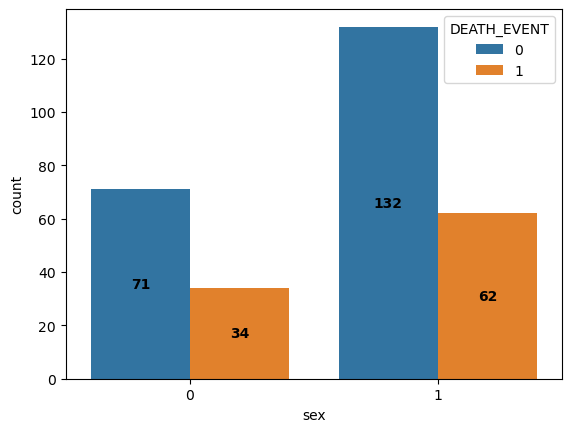

In [18]:
ax = sns.countplot(x=df.sex, hue=df.DEATH_EVENT)

for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10, color='black', weight='bold')

plt.show()

## Histograms for continuos columnsas

In [19]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

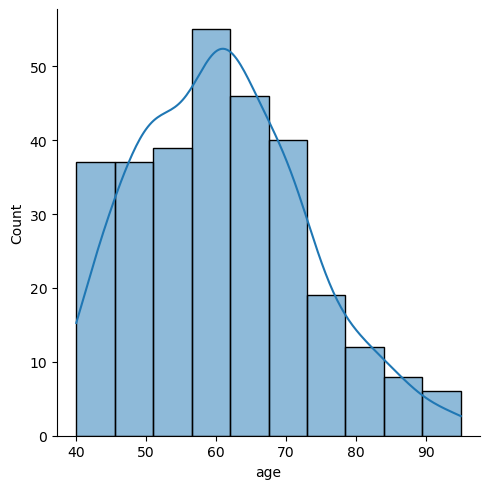

In [20]:
sns.displot(df.age,kde=True)

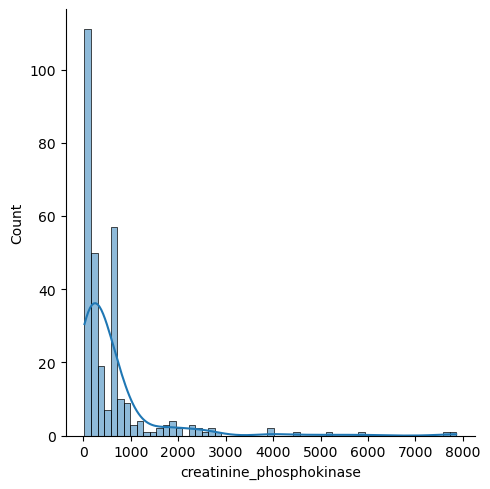

In [21]:
sns.displot(df.creatinine_phosphokinase,kde=True)

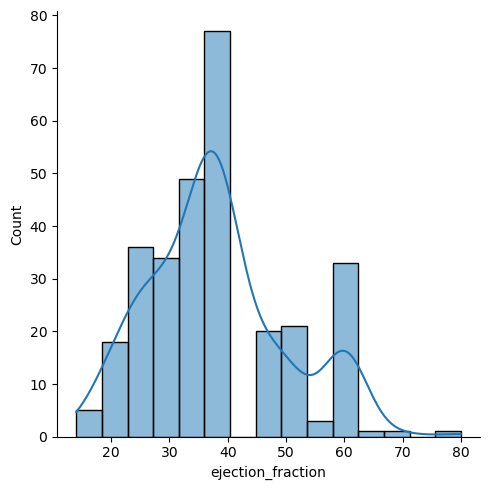

In [22]:
sns.displot(df.ejection_fraction,kde=True)

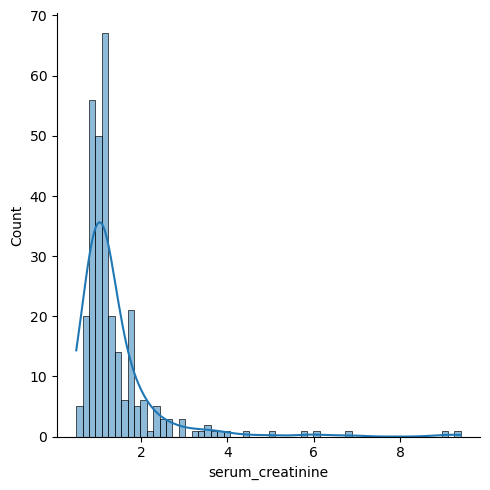

In [23]:
sns.displot(df.serum_creatinine,kde=True)

# 2. Data Visualization

In [24]:
correlation_matrix = df.corr()

In [25]:
correlation_matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


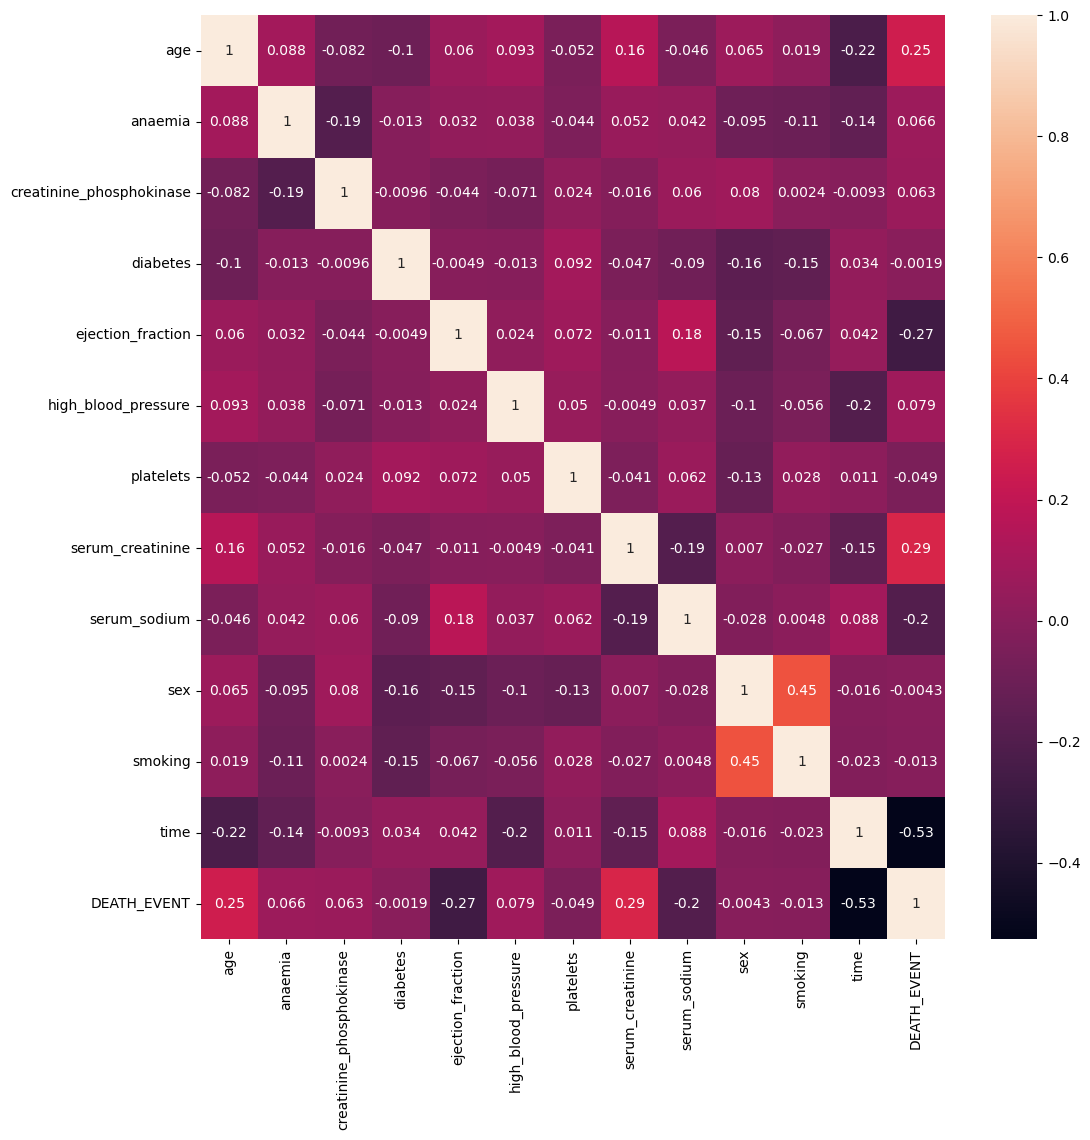

In [26]:
# task 6
plt.figure(figsize=[12,12])
sns.heatmap(correlation_matrix,annot=True)
plt.show()

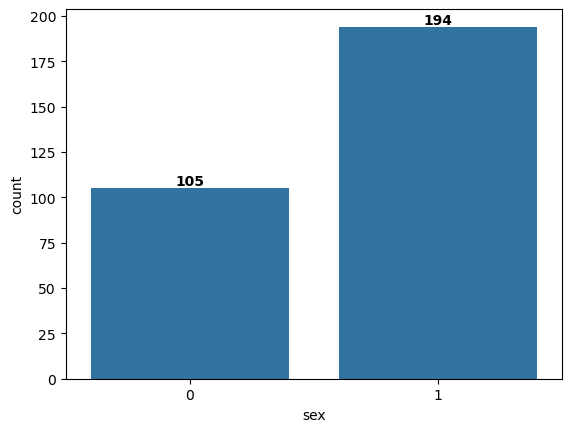

In [27]:
#  task 7
ax = sns.countplot(x=df.sex)
for container in ax.containers:
    ax.bar_label(container,label_type="edge",color="black",weight="bold")
plt.show()

In [28]:
def set_count_number(a):
    for container in a.containers:
        a.bar_label(container,label_type="edge",color="black",weight="bold")

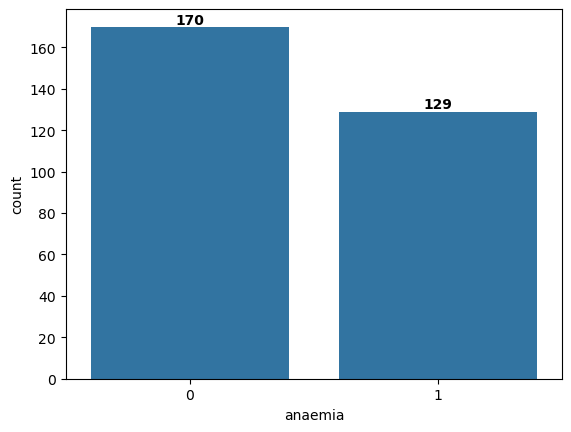

In [29]:
ax = sns.countplot(x= df.anaemia)
set_count_number(ax)
plt.show()

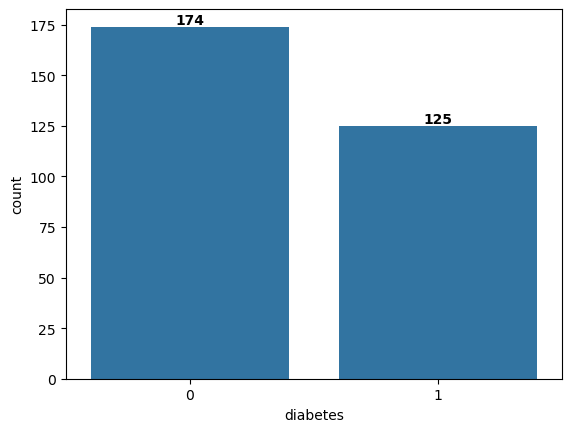

In [30]:
ax = sns.countplot(x= df.diabetes)
set_count_number(ax)
plt.show()

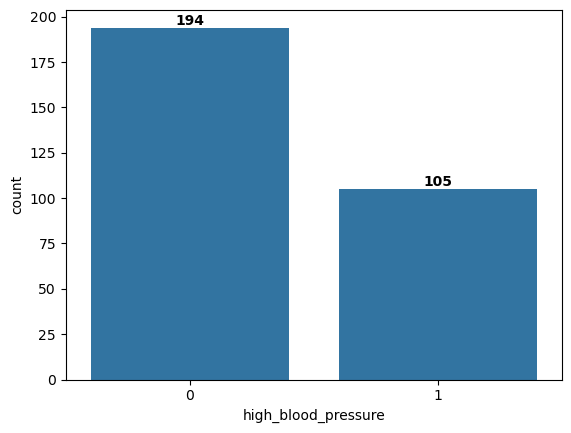

In [31]:
ax = sns.countplot(x= df.high_blood_pressure)
set_count_number(ax)
plt.show()

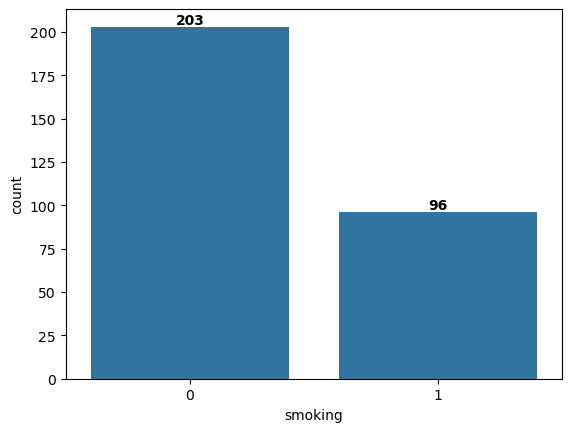

In [32]:
ax = sns.countplot(x= df.smoking)
set_count_number(ax)
plt.show()

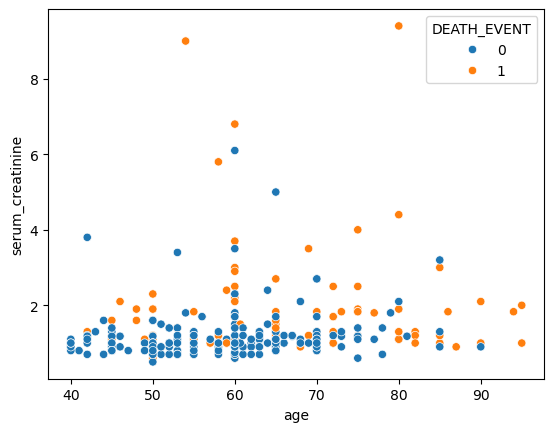

In [33]:
# task 8
sns.scatterplot(x=df.age,y=df.serum_creatinine,hue=df.DEATH_EVENT)
plt.show()

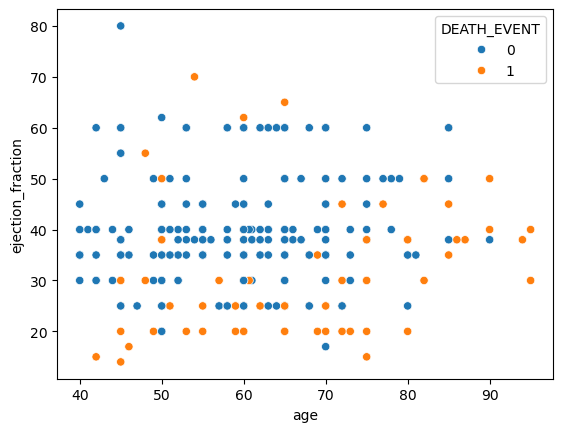

In [34]:
sns.scatterplot(x=df.age,y=df.ejection_fraction,hue=df.DEATH_EVENT)
plt.show()

# 3. Model building

In [35]:
# task 9
x = df.drop(columns=["DEATH_EVENT"])
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [36]:
y = df.DEATH_EVENT
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [37]:
# task 10
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [39]:
print(len(x_train),len(y_train))

209 209


In [40]:
print(len(x_test),len(y_test))

90 90


In [41]:
y_train.value_counts()

DEATH_EVENT
0    150
1     59
Name: count, dtype: int64

In [42]:
# task 11
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [45]:
x_train_scaled

array([[-0.23715146, -0.85280287,  0.00723085, ...,  0.76376262,
        -0.65689181,  0.91716729],
       [ 0.79246571, -0.85280287, -0.44852519, ..., -1.30930734,
        -0.65689181, -0.86699147],
       [-1.60997435,  1.17260394, -0.52971688, ...,  0.76376262,
         1.5223207 ,  0.86582459],
       ...,
       [-0.49455575, -0.85280287,  0.18693513, ...,  0.76376262,
        -0.65689181, -0.58460663],
       [-1.43837149, -0.85280287,  0.00723085, ...,  0.76376262,
         1.5223207 ,  1.41775859],
       [ 1.65048002, -0.85280287,  0.34931852, ...,  0.76376262,
         1.5223207 , -0.5974423 ]])

In [46]:
x_test_scaled

array([[ 0.79246571, -0.85280287,  0.00723085, ...,  0.76376262,
         1.5223207 ,  1.49477264],
       [-0.92356291,  1.17260394, -0.30021503, ...,  0.76376262,
         1.5223207 ,  1.36641589],
       [-1.35257006, -0.85280287,  2.02078486, ...,  0.76376262,
        -0.65689181, -0.05834397],
       ...,
       [ 1.82208288,  1.17260394, -0.212528  , ...,  0.76376262,
        -0.65689181, -1.54728221],
       [ 1.22147286,  1.17260394, -0.53512966, ...,  0.76376262,
         1.5223207 , -1.58578924],
       [-0.92356291, -0.85280287, -0.35217771, ...,  0.76376262,
         1.5223207 , -0.17386505]])

# 4. model training and evaluation

In [47]:
# task 12
from sklearn.linear_model import LogisticRegression

In [48]:
LoRe = LogisticRegression().fit(x_train_scaled,y_train)

In [49]:
lore_pre = LoRe.predict(x_test_scaled)
lore_pre

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0])

In [50]:
# accuracy, precision, recall and F1 score for LoRe
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, RocCurveDisplay

In [51]:
print(f"test accuracy = {accuracy_score(y_test,lore_pre)*100:.2f} and training accuarcy = {accuracy_score(y_train,LoRe.predict(x_train_scaled))*100:.2f}")

test accuracy = 78.89 and training accuarcy = 88.04


In [52]:
print(f"Precision Score: {precision_score(y_test,lore_pre)*100}")

Precision Score: 87.5


In [53]:
print(f"Recall Score: {recall_score(y_test,lore_pre)*100}")

Recall Score: 56.75675675675676


In [54]:
print(f"F1 Score: {f1_score(y_test,lore_pre)*100}")

F1 Score: 68.85245901639344


In [55]:
# task 13
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier().fit(x_train_scaled,y_train)

In [57]:
knn_pre = knn.predict(x_test_scaled)
knn_pre

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0])

In [58]:
# evaluate the model
print(classification_report(y_test,knn_pre))


              precision    recall  f1-score   support

           0       0.66      0.91      0.76        53
           1       0.71      0.32      0.44        37

    accuracy                           0.67        90
   macro avg       0.68      0.61      0.60        90
weighted avg       0.68      0.67      0.63        90



In [59]:
# task 14 
from sklearn.tree import DecisionTreeClassifier

In [60]:
dtc = DecisionTreeClassifier().fit(x_train_scaled,y_train)

In [61]:
dtc_pre = dtc.predict(x_test_scaled)
dtc_pre

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0])

In [62]:
dtc_score = round(dtc.score(x_test_scaled,y_test)*100,2)
dtc_score

72.22

In [63]:
knn_score = round(knn.score(x_test_scaled,y_test)*100,2)

In [64]:
knn_score

66.67

In [65]:
lore_score = round(LoRe.score(x_test_scaled,y_test)*100,2)

In [66]:
lore_score

78.89

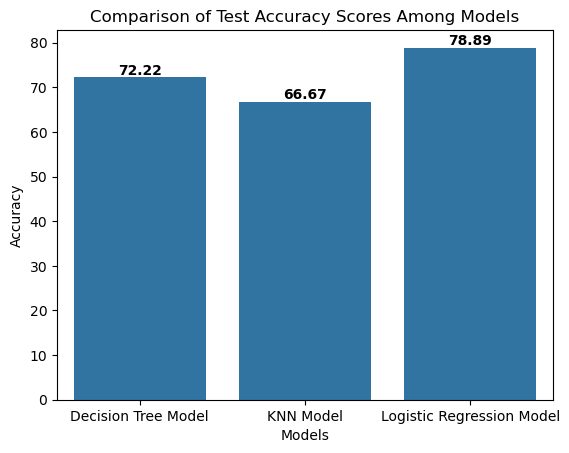

In [67]:
# comparison models performance
accuraies = {
    "Decision Tree Model": dtc_score,
    "KNN Model": knn_score,
    "Logistic Regression Model": lore_score
}
plt.title("Comparison of Test Accuracy Scores Among Models")
a = sns.barplot(x=accuraies.keys(),y=accuraies.values())
set_count_number(a)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

# 5. cross validation

In [68]:
# Task 15: Perform K-Fold Cross-Validation (with 5 folds) on the Logistic Regression model to evaluate its performance.
from sklearn.model_selection import KFold, cross_val_score

In [69]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

In [70]:
kfold_scores = cross_val_score(LoRe, x_train_scaled, y_train, cv=k_fold, scoring='accuracy')

In [71]:
kfold_scores

array([0.83333333, 0.76190476, 0.78571429, 0.78571429, 0.92682927])

In [72]:
kfold_scores_mean = kfold_scores.mean()

In [73]:
kfold_scores_mean

np.float64(0.8186991869918699)

In [74]:
folds = [f"Fold{i+1}" for i in range(len(kfold_scores))]
folds

['Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5']

In [75]:
kfold_scores = [round(kfold_scores[i],2) for i in range(len(kfold_scores))]
kfold_scores

[np.float64(0.83),
 np.float64(0.76),
 np.float64(0.79),
 np.float64(0.79),
 np.float64(0.93)]

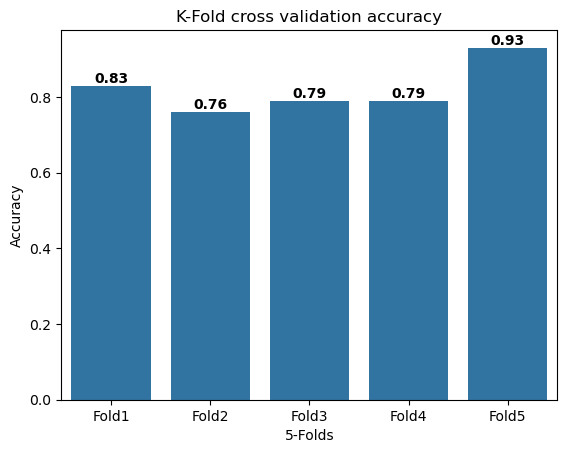

In [76]:
a = sns.barplot(x=folds,y=kfold_scores)
plt.title("K-Fold cross validation accuracy")
set_count_number(a)
plt.xlabel("5-Folds")
plt.ylabel("Accuracy")
plt.show()

In [77]:
# Task 16: Perform Stratified K-Fold Cross-Validation to ensure class balance during cross-validation.
from sklearn.model_selection import StratifiedKFold

In [78]:
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [79]:
# checking wheather classes are balanced or imbalanced
value_counts_y = df.DEATH_EVENT.value_counts()
value_counts_y

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

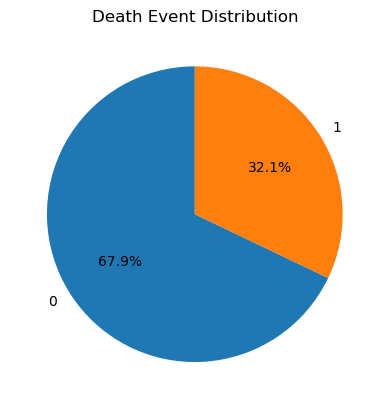

In [80]:
plt.pie(value_counts_y,labels=value_counts_y.index,autopct="%1.1f%%",startangle=90)
plt.title("Death Event Distribution")
plt.show()

In [81]:
strat_kfold_scores = cross_val_score(LoRe, x_train_scaled, y_train, cv=strat_kfold, scoring='accuracy')
strat_kfold_scores

array([0.80952381, 0.80952381, 0.76190476, 0.73809524, 0.87804878])

In [82]:
strat_folds = [f"Fold{i+1}" for i in range(len(strat_kfold_scores))]
strat_folds

['Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5']

In [83]:
strat_kfold_scores = [round(strat_kfold_scores[i],2) for i in range(len(strat_kfold_scores))]
strat_kfold_scores

[np.float64(0.81),
 np.float64(0.81),
 np.float64(0.76),
 np.float64(0.74),
 np.float64(0.88)]

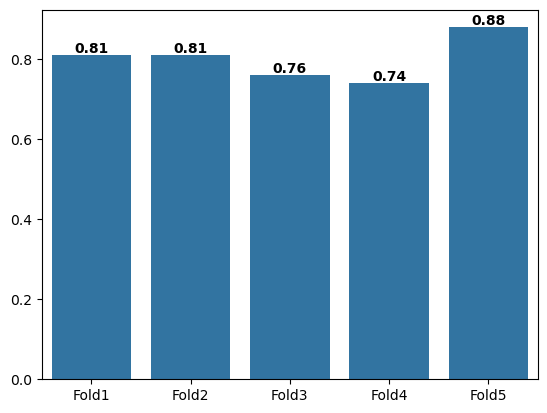

In [84]:
a = sns.barplot(x=strat_folds,y=strat_kfold_scores)
set_count_number(a)
plt.show()

# Model Improvement

In [85]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

In [86]:
# Task 17: Use Grid Search or Randomized Search to tune the hyperparameters of the KNN and Decision Tree models.
# Randomized Search for KNN
knn_param_dist = {
    'n_neighbors': randint(1, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2, 3]
}
knn_random_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=knn_param_dist,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)


In [87]:
knn_random_search.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=30, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7aefdff330e0>,
                                        'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy', verbose=1)

In [88]:
# Best parameters and score
print("KNN Randomized Search Best Parameters:", knn_random_search.best_params_)
print("KNN Randomized Search Best Cross-validation Score:", knn_random_search.best_score_)

KNN Randomized Search Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
KNN Randomized Search Best Cross-validation Score: 0.7562137049941928


In [89]:
knn_random_best = knn_random_search.best_estimator_
y_pred_knn_random = knn_random_best.predict(x_test_scaled)
print("KNN Randomized Search Test Accuracy:", accuracy_score(y_test, y_pred_knn_random))

KNN Randomized Search Test Accuracy: 0.6777777777777778


In [90]:
# Randomized search for DT
dt_param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'min_impurity_decrease': uniform(0.0, 0.1)
}
dt_random_search = RandomizedSearchCV(
    estimator=dtc,
    param_distributions=dt_param_dist,
    n_iter=35,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

In [91]:
dt_random_search.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=35,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7aefd46be990>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7aefd4692900>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7aefd46d7230>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7aefd76cdd10>},
                   random_state=42, scoring='accuracy', verbose=1)

In [92]:
# Best parameters and score
print("Decision Tree Randomized Search Best Parameters:", dt_random_search.best_params_)
print("Decision Tree Randomized Search Best Cross-validation Score:", dt_random_search.best_score_)

Decision Tree Randomized Search Best Parameters: {'criterion': 'gini', 'max_depth': 29, 'max_features': None, 'min_impurity_decrease': np.float64(0.01652669390630025), 'min_samples_leaf': 9, 'min_samples_split': 8}
Decision Tree Randomized Search Best Cross-validation Score: 0.8758420441347271


In [93]:
dt_random_best = dt_random_search.best_estimator_
y_pred_dt_random = dt_random_best.predict(x_test_scaled)
print("Decision Tree Randomized Search Test Accuracy:", accuracy_score(y_test, y_pred_dt_random))

Decision Tree Randomized Search Test Accuracy: 0.7444444444444445


In [94]:
# Task 18: Plot the ROC curves and calculate the AUC for all models to compare their performance visually.

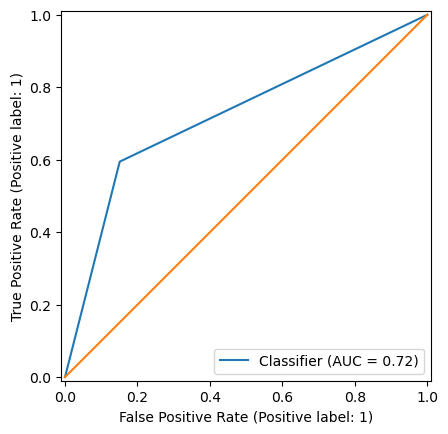

In [95]:
# ROC Curve for Decision Tree Randomized Search
RocCurveDisplay.from_predictions(y_test,y_pred_dt_random)
plt.plot([0,1],[0,1])
plt.show()

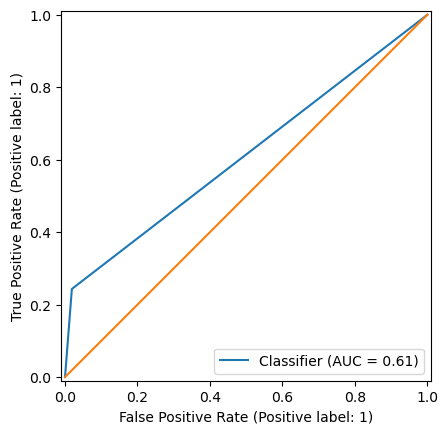

In [96]:
# ROC Curve for KNN Randomized Search
RocCurveDisplay.from_predictions(y_test,y_pred_knn_random)
plt.plot([0,1],[0,1])
plt.show()

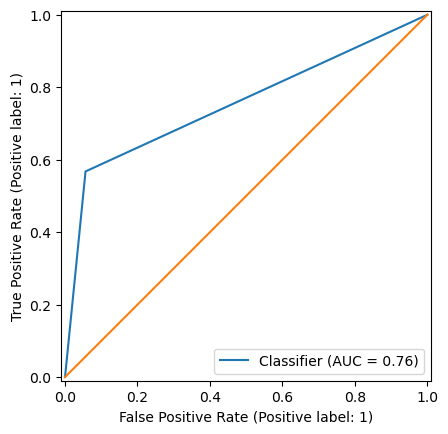

In [97]:
# ROC curve for Logistic regresion

RocCurveDisplay.from_predictions(y_test,lore_pre)
plt.plot([0,1],[0,1])
plt.show()

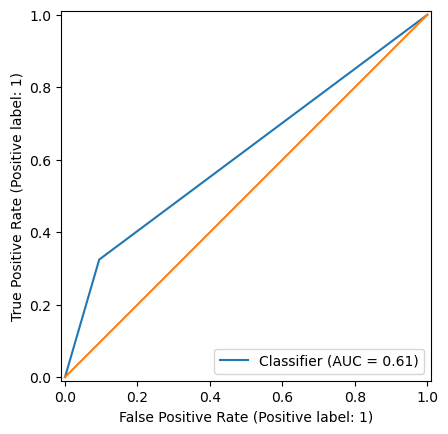

In [98]:
# ROC curve for KNN
RocCurveDisplay.from_predictions(y_test,knn_pre)
plt.plot([0,1],[0,1])
plt.show()

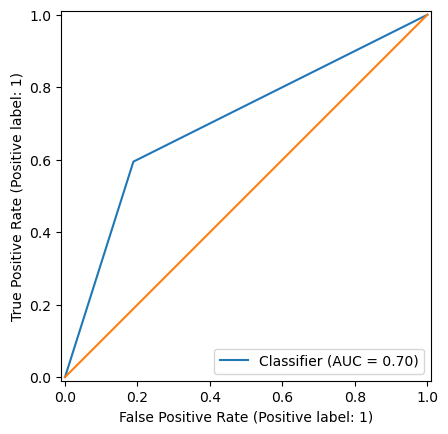

In [99]:
# ROC curve for Decision Tree
RocCurveDisplay.from_predictions(y_test,dtc_pre)
plt.plot([0,1],[0,1])
plt.show()

In [100]:
accuraies2 = {
    "DT_randomized_search": round(accuracy_score(y_test, y_pred_dt_random),2),
    "KNN_randomized_search": round(accuracy_score(y_test, y_pred_knn_random),2),
    "Logistic_Regression": round(accuracy_score(y_test,lore_pre),2),
    "KNN": round(accuracy_score(y_test,knn_pre),2),
    "Decision_Tree": round(accuracy_score(y_test,dtc_pre),2)
}

In [101]:
[print(i) for i in accuraies2.values()]

0.74
0.68
0.79
0.67
0.72


[None, None, None, None, None]

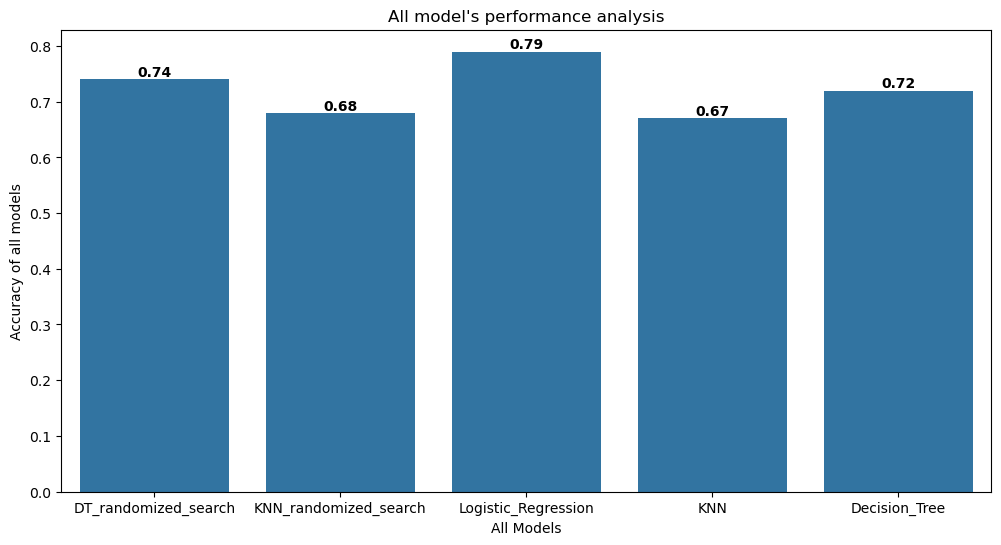

In [102]:
plt.figure(figsize=[12,6])
plt.title("All model's performance analysis")
a = sns.barplot(x=accuraies2.keys(),y=accuraies2.values())
set_count_number(a)
plt.xlabel("All Models")
plt.ylabel("Accuracy of all models")
plt.show()

# potential improvements by using MI

In [103]:
# potential improvements by using Mutual Information
# calculate MI
from sklearn.feature_selection import mutual_info_classif

In [104]:
mi_scores = mutual_info_classif(x,y,random_state=42)

In [107]:
mi_scores

array([0.0478544 , 0.        , 0.03077916, 0.        , 0.06111689,
       0.00986155, 0.        , 0.07612565, 0.02128271, 0.        ,
       0.01659014, 0.24079782])

In [108]:
mi_df = pd.DataFrame({
    "Features": x.columns,
    "MI_Score": mi_scores
})

In [110]:
mi_df.sort_values("MI_Score",ascending=False,inplace=True)

In [111]:
mi_df

,Features,MI_Score
11,time,0.240798
7,serum_creatinine,0.076126
4,ejection_fraction,0.061117
0,age,0.047854
2,creatinine_phosphokinase,0.030779
8,serum_sodium,0.021283
10,smoking,0.016590
5,high_blood_pressure,0.009862
3,diabetes,0.000000
1,anaemia,0.000000


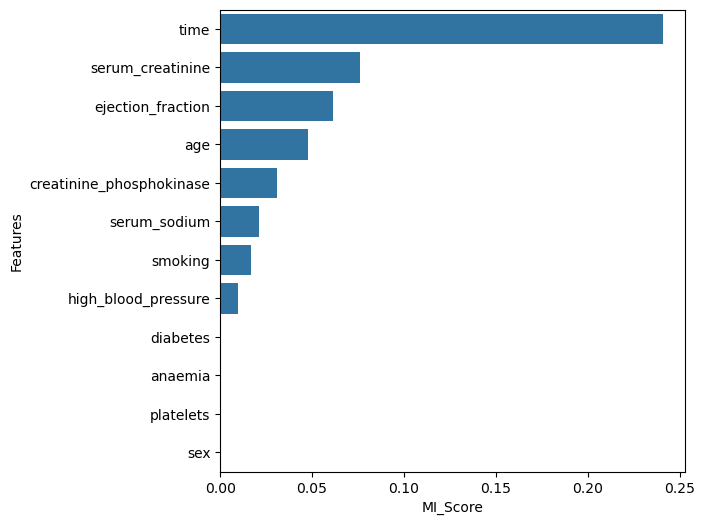

In [115]:
plt.figure(figsize=[6,6])
sns.barplot(x=mi_df.MI_Score,y=mi_df.Features)
plt.show()

In [119]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [121]:
x1 = df.drop(["diabetes","anaemia","platelets","sex"],axis=1)

In [122]:
x1

,age,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,smoking,time,DEATH_EVENT
0,75.0,582,20,1,1.9,130,0,4,1
1,55.0,7861,38,0,1.1,136,0,6,1
2,65.0,146,20,0,1.3,129,1,7,1
3,50.0,111,20,0,1.9,137,0,7,1
4,65.0,160,20,0,2.7,116,0,8,1
...,...,...,...,...,...,...,...,...,...
294,62.0,61,38,1,1.1,143,1,270,0
295,55.0,1820,38,0,1.2,139,0,271,0
296,45.0,2060,60,0,0.8,138,0,278,0
297,45.0,2413,38,0,1.4,140,1,280,0


In [125]:
x1.shape

(299, 9)

In [126]:
y.shape

(299,)

In [128]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state=42)

In [129]:
x1_train.head()

,age,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,smoking,time,DEATH_EVENT
224,58.0,582,25,0,1.0,138,0,205,0
68,70.0,161,25,0,1.2,142,0,66,1
222,42.0,86,35,0,1.1,139,1,201,0
37,82.0,855,50,1,1.0,145,0,30,1
16,87.0,149,38,0,0.9,140,0,14,1


In [131]:
print(x1_train.shape,y1_train.shape)

(209, 9) (209,)


In [132]:
print(x1_test.shape,y1_test.shape)

(90, 9) (90,)


## SMOTE

In [133]:
from imblearn.over_sampling import SMOTE

In [134]:
somte = SMOTE(random_state=42)
x1_train_resampled,y1_train_resampled = somte.fit_resample(x1_train,y1_train)

In [135]:
print(f"Original class value: {y1_train.value_counts()}, Resampled class value: {y1_train_resampled.value_counts()}")

Original class value: DEATH_EVENT
0    150
1     59
Name: count, dtype: int64, Resampled class value: DEATH_EVENT
0    150
1    150
Name: count, dtype: int64


In [136]:
from collections import Counter

In [138]:
print(f"Original: {Counter(y1_train)}, Resampled: {Counter(y1_train_resampled)}")

Original: Counter({0: 150, 1: 59}), Resampled: Counter({0: 150, 1: 150})


In [139]:
x1_train_resampled.head()

,age,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,smoking,time,DEATH_EVENT
0,58.0,582,25,0,1.0,138,0,205,0
1,70.0,161,25,0,1.2,142,0,66,1
2,42.0,86,35,0,1.1,139,1,201,0
3,82.0,855,50,1,1.0,145,0,30,1
4,87.0,149,38,0,0.9,140,0,14,1


In [140]:
x1_train_resampled.shape

(300, 9)

In [141]:
x1_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       300 non-null    float64
 1   creatinine_phosphokinase  300 non-null    int64  
 2   ejection_fraction         300 non-null    int64  
 3   high_blood_pressure       300 non-null    int64  
 4   serum_creatinine          300 non-null    float64
 5   serum_sodium              300 non-null    int64  
 6   smoking                   300 non-null    int64  
 7   time                      300 non-null    int64  
 8   DEATH_EVENT               300 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 21.2 KB


In [142]:
LoR_somte_mi = LogisticRegression().fit(x1_train_resampled,y1_train_resampled)

/home/shahriar-hussain/Software/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [143]:
LoR_somte_mi_pre = LoR_somte_mi.predict(x1_test)

In [144]:
LoR_somte_mi_pre

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0])

In [147]:
LoR_somte_mi_score = accuracy_score(y1_test,LoR_somte_mi_pre)
LoR_somte_mi_score*100

100.0

In [148]:
LoR_somte_mi_score1 = LoR_somte_mi.score(x1_test,y1_test)
LoR_somte_mi_score1

1.0

In [149]:
KNN_smote_mi = KNeighborsClassifier().fit(x1_train_resampled,y1_train_resampled)

In [150]:
KNN_smote_mi_pre = KNN_smote_mi.predict(x1_test)

In [151]:
KNN_smote_mi_pre

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0])

In [153]:
KNN_smote_mi_score = accuracy_score(y1_test,KNN_smote_mi_pre)
KNN_smote_mi_score*100

70.0

In [154]:
DT_somte_mi = DecisionTreeClassifier().fit(x1_train_resampled,y1_train_resampled)

In [155]:
DT_somte_mi_pre = DT_somte_mi.predict(x1_test)

In [156]:
DT_somte_mi_pre

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0])

In [157]:
DT_somte_mi_score = accuracy_score(y1_test,DT_somte_mi_pre)
DT_somte_mi_score*100

100.0

In [162]:
# visualization of all models
accuraies3 = {
    "DT_randomized_search": round(accuracy_score(y_test, y_pred_dt_random)*100,2),
    "KNN_randomized_search": round(accuracy_score(y_test, y_pred_knn_random)*100,2),
    "Logistic_Regression": round(accuracy_score(y_test,lore_pre)*100,2),
    "KNN": round(accuracy_score(y_test,knn_pre)*100,2),
    "Decision_Tree": round(accuracy_score(y_test,dtc_pre)*100,2),
    "LR_SMOTE_MI": LoR_somte_mi_score*100,
    "KNN_SMOTE_MI":KNN_smote_mi_score*100,
    "DT_SMOTE_MI": DT_somte_mi_score*100
    
}

In [163]:
for i in accuraies3.values():
    print(i)

74.44
67.78
78.89
66.67
72.22
100.0
70.0
100.0


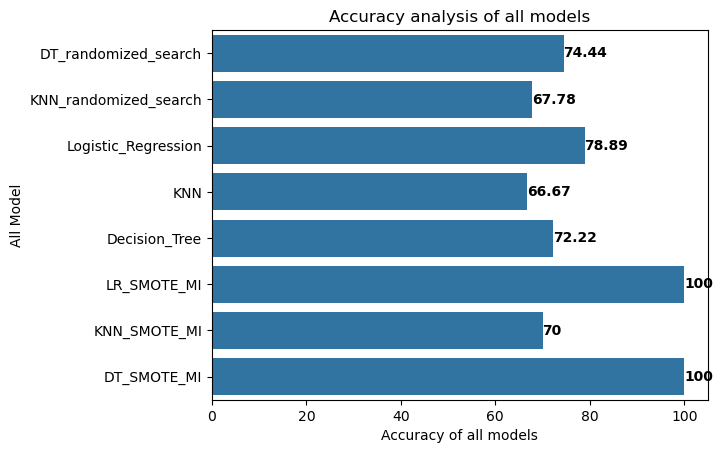

In [168]:
a = sns.barplot(x=accuraies3.values(),y=accuraies3.keys())
set_count_number(a)
plt.title("Accuracy analysis of all models")
plt.xlabel("Accuracy of all models")
plt.ylabel("All Model")
plt.show()

## Submission Instructions:
- Submit your notebook file to github with the completed analysis.
- Ensure that the notebook is well-documented with explanations for each step.
- Include visualizations and comments on the results of each model.
- Submit github link only